# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
import pandas as pd
import numpy as np
import glob
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [2]:
# Set the folder path
guineaFolderPath = DATA_FOLDER + '/ebola/guinea_data'
liberiaFolderPath = DATA_FOLDER + '/ebola/liberia_data'
slFolderPath = DATA_FOLDER + '/ebola/sl_data'

#### Data preparation

In [3]:
#Year average
yearAverage = pd.DataFrame(columns=['country', 'new_cases', 'new_deaths'])

#get all data from the Guinea folder
#allGuineaFiles = glob.glob(guineaFolderPath + "/*.csv")
#guineaFram = pd.concat((pd.read_csv(f) for f in allGuineaFiles))

#### Needed data
We have to keep track of the date, the description and the total of case

We count as new case:
-  New cases of confirmed

We count as new death:
-  New deaths registered  
-  New deaths registered today (confirmed)

#### Guinea
Each file corresponding to one day

In [4]:
#Daily data
dailyData = pd.DataFrame(columns=['date', 'country', 'new_cases', 'new_deaths'])

for filename in glob.glob(guineaFolderPath + "/*.csv"):
    df = pd.read_csv(filename, index_col='Description')
    
    casesRow = df.loc["New cases of confirmed"]
    case = casesRow['Totals']
    
    try:
        deathRow = df.loc["New deaths registered today (confirmed)"]
    except KeyError:
        deathRow = df.loc["New deaths registered"]
    death = deathRow['Totals']
    
    date = deathRow['Date']
    
    dailyData = dailyData.append({
            'date': date,
            'country': 'Guinea',
            'new_cases': case,
            'new_deaths': death,
        }, ignore_index=True)
#set the column to the correct type
dailyData['new_cases'] = pd.to_numeric(dailyData['new_cases'])
dailyData['new_deaths'] = pd.to_numeric(dailyData['new_deaths'])
dailyData['date'] = pd.to_datetime(dailyData['date'])

#compute the average per year and add it to the dataframe
temp = dailyData.groupby(dailyData['date'].dt.year).sum().divide(dailyData.shape[0])
temp['country'] = 'Guinea'    
frames = [yearAverage, temp]
yearAverage = pd.concat(frames)

#### Liberia
Same logic as Guinea

We count as new case:
-  New case/s (confirmed)

We count as new death:
-  Newly reported deaths

In [5]:
#Daily data
dailyData = pd.DataFrame(columns=['date', 'country', 'new_cases', 'new_deaths'])

for filename in glob.glob(liberiaFolderPath + "/*.csv"):
    df = pd.read_csv(filename, index_col='Variable')
    
    casesRow = df.loc["New case/s (confirmed)"]
    case = casesRow['National']
    
    
    deathRow = df.loc["Newly reported deaths"]    
    death = deathRow['National']
    
    date = deathRow['Date']
    
    dailyData = dailyData.append({
            'date': date,
            'country': 'Liberia',
            'new_cases': case,
            'new_deaths': death,
        }, ignore_index=True)
#set the column to the correct type
dailyData['new_cases'] = pd.to_numeric(dailyData['new_cases'])
dailyData['new_deaths'] = pd.to_numeric(dailyData['new_deaths'])
dailyData['date'] = pd.to_datetime(dailyData['date'])

#compute the average per year and add it to the dataframe
temp = dailyData.groupby(dailyData['date'].dt.year).sum().divide(dailyData.shape[0])
temp['country'] = 'Liberia'
frames = [yearAverage, temp]
yearAverage = pd.concat(frames)

#### Sri Lanka
Same logic as Guinea and Liberia

We count as new case:
-  new_confirmed

We count as new death:
-  etc_new_deaths

In [6]:
#Daily data
dailyData = pd.DataFrame(columns=['date', 'country', 'new_cases', 'new_deaths'])

for filename in glob.glob(slFolderPath + "/*.csv"):
    df = pd.read_csv(filename, index_col='variable')
    
    casesRow = df.loc["new_confirmed"]
    case = casesRow['National']
    
    
    deathRow = df.loc["etc_new_deaths"]    
    death = deathRow['National']
    
    date = deathRow['date']
    
    dailyData = dailyData.append({
            'date': date,
            'country': 'Sri Lanka',
            'new_cases': case,
            'new_deaths': death,
        }, ignore_index=True)
#set the column to the correct type
dailyData['new_cases'] = pd.to_numeric(dailyData['new_cases'])
dailyData['new_deaths'] = pd.to_numeric(dailyData['new_deaths'])
dailyData['date'] = pd.to_datetime(dailyData['date'])

#compute the average per year and add it to the dataframe
temp = dailyData.groupby(dailyData['date'].dt.year).sum().divide(dailyData.shape[0])
temp['country'] = 'Sri Lanka'
frames = [yearAverage, temp]
yearAverage = pd.concat(frames)

#### Final result
The final resulte give the year as index and the daily average per year of new cases and new deaths for each country

In [7]:
yearAverage

,country,new_cases,new_deaths
2014,Guinea,12.545455,4.045455
2014,Liberia,176.600000,20.380000
2014,Sri Lanka,42.504854,1.262136


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [8]:
# Read the metadata
folderPath = DATA_FOLDER + '/microbiome'
metaRaw = pd.read_excel((folderPath + '/metadata.xls'), sheetname='Sheet1', index_col=0)

In [9]:
#Change the NaN value to unknown
meta = metaRaw.fillna('unknown')
meta

,GROUP,SAMPLE
BARCODE,,
MID1,EXTRACTION CONTROL,unknown
MID2,NEC 1,tissue
MID3,Control 1,tissue
MID4,NEC 2,tissue
MID5,Control 2,tissue
MID6,NEC 1,stool
MID7,Control 1,stool
MID8,NEC 2,stool
MID9,Control 2,stool


In [10]:
# Read the each data spreadsheet
md1Raw = pd.read_excel((folderPath + '/MID1.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md1 = md1Raw.fillna('unknown')
md1.head()
md1.shape

(272, 2)

In [11]:
md2Raw = pd.read_excel((folderPath + '/MID2.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md2 = md2Raw.fillna('unknown')
md2.head()
md2.shape

(288, 2)

In [12]:
md3Raw = pd.read_excel((folderPath + '/MID3.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md3 = md3Raw.fillna('unknown')
md3.head()
md3.shape

(367, 2)

In [13]:
md4Raw = pd.read_excel((folderPath + '/MID4.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md4 = md4Raw.fillna('unknown')
md4.head()
md4.shape

(134, 2)

In [14]:
md5Raw = pd.read_excel((folderPath + '/MID5.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md5 = md5Raw.fillna('unknown')
md5.head()
md5.shape

(379, 2)

In [15]:
md6Raw = pd.read_excel((folderPath + '/MID6.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md6 = md6Raw.fillna('unknown')
md6.head()
md6.shape

(181, 2)

In [16]:
md7Raw = pd.read_excel((folderPath + '/MID7.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md7 = md7Raw.fillna('unknown')
md7.head()
md7.shape

(395, 2)

In [17]:
md8Raw = pd.read_excel((folderPath + '/MID8.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md8 = md8Raw.fillna('unknown')
md8.head()
md8.shape

(99, 2)

In [18]:
md9Raw = pd.read_excel((folderPath + '/MID9.xls'), sheetname='Sheet 1', header=None)
#Change the NaN value to unknown
md9 = md9Raw.fillna('unknown')
md9.head()
md9.shape

(281, 2)

In [19]:
md1.columns = md2.columns = md3.columns = md4.columns = md5.columns = md6.columns = md7.columns = md8.columns = md9.columns = ['Taxon', 'Count']

#Add Group column (Adding them one by one is easier)
md1['Group'] = meta.GROUP['MID1']
md2['Group'] = meta.GROUP['MID2']
md3['Group'] = meta.GROUP['MID3']
md4['Group'] = meta.GROUP['MID4']
md5['Group'] = meta.GROUP['MID5']
md6['Group'] = meta.GROUP['MID6']
md7['Group'] = meta.GROUP['MID7']
md8['Group'] = meta.GROUP['MID8']
md9['Group'] = meta.GROUP['MID9']
#Add Sample
md1['Sample'] = meta.SAMPLE['MID1']
md2['Sample'] = meta.SAMPLE['MID2']
md3['Sample'] = meta.SAMPLE['MID3']
md4['Sample'] = meta.SAMPLE['MID4']
md5['Sample'] = meta.SAMPLE['MID5']
md6['Sample'] = meta.SAMPLE['MID6']
md7['Sample'] = meta.SAMPLE['MID7']
md8['Sample'] = meta.SAMPLE['MID8']
md9['Sample'] = meta.SAMPLE['MID9']
#Concatenate everything into one DataFrame
md = pd.concat([md1, md2, md3, md4, md5, md6, md7, md8, md9], axis=0)
md


,Taxon,Count,Group,Sample
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,EXTRACTION CONTROL,unknown
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,EXTRACTION CONTROL,unknown


In [20]:
#Hierarchical Index Name, Group, Sample to account for the Bacterias overlap and keep the index unique
mdIndexed = md.set_index(['Taxon', 'Group', 'Sample'])
mdIndexed

,,,Count
Taxon,Group,Sample,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",EXTRACTION CONTROL,unknown,7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",EXTRACTION CONTROL,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",EXTRACTION CONTROL,unknown,3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",EXTRACTION CONTROL,unknown,3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",EXTRACTION CONTROL,unknown,7
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methanosarcinaceae Methanimicrococcus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanosarcinales Methermicoccaceae Methermicoccus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Ferroglobus",EXTRACTION CONTROL,unknown,1
"Archaea ""Euryarchaeota"" Archaeoglobi Archaeoglobales Archaeoglobaceae Geoglobus",EXTRACTION CONTROL,unknown,1


In [21]:
mdIndexed.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [495]:
from IPython.core.display import HTML

HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [496]:
# Write your answer here

import pandas as pd

%pylab inline

data = pd.read_excel(DATA_FOLDER+'/titanic.xls')

Populating the interactive namespace from numpy and matplotlib


/home/christo/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [497]:
# 1

#First we clean the data
# Ticket numbers: keep only the digits
data['ticket'] = data['ticket'].astype('str').str.replace('\D+', '').replace('', '0').astype('int')
data['body'] = data['body'].fillna('0').astype('int')

#data['boat'] = data['boat'].fillna('0').astype('category').cat.as_ordered().cat.set_categories(data['boat'].fillna('0').unique(), ordered=True)
#print(data['boat'].unique())

#data['boat'] = pd.Categorical(data['boat'].fillna('0'), ordered=True)
#print(data['boat'].min())

data['cabin'] = pd.Categorical(data['cabin'].fillna(''), ordered=True) # TODO fillna category value

# Create dummy values for embarkation port
#embarkedDummies = pd.get_dummies(data['embarked'], prefix='emb')
#data = pd.concat([data, embarkedDummies], axis=1)
#data = data.drop('embarked',axis=1)



data['home.dest'] = data['home.dest'].fillna('Unkown')

print(data['name'].dtype)
data['name'] = data['name'].astype(str)
print(data['name'].dtype)

# Now create the dataframe to display the types and range
typeDf = data.dtypes
typeDf.name = 'Type'

minDf = data.min(skipna=True, numeric_only=None)
minDf.name = 'Min value'

maxDf = data.max(skipna=True, numeric_only=None)
maxDf.name = 'Max value'

rangeDf = pd.concat([typeDf, minDf, maxDf], axis=1)
print(rangeDf)
print(rangeDf.shape)


object
object
               Type            Min value                    Max value
age         float64               0.1667                           80
boat         object                  NaN                          NaN
body          int64                    0                          328
cabin      category                                                 T
embarked     object                  NaN                          NaN
fare        float64                    0                      512.329
home.dest    object        ?Havana, Cuba          Zurich, Switzerland
name         object  Abbing, Mr. Anthony  van Melkebeke, Mr. Philemon
parch         int64                    0                            9
pclass        int64                    1                            3
sex          object               female                         male
sibsp         int64                    0                            8
survived      int64                    0                            1
ticket

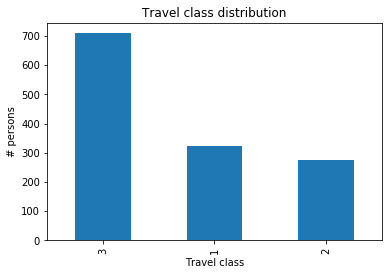

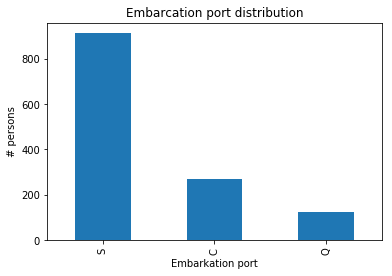

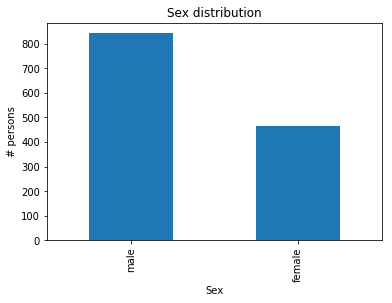

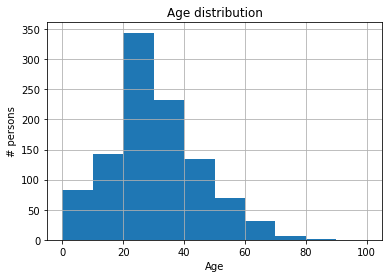

In [498]:
# 2

data['pclass'].value_counts().plot(kind='bar',sort_columns=True)
plt.title('Travel class distribution')
plt.xlabel('Travel class')
plt.ylabel('# persons')

plt.figure(0)


data['embarked'].value_counts().plot(kind='bar')
plt.title('Embarcation port distribution')
plt.xlabel('Embarkation port')
plt.ylabel('# persons')

plt.figure(2)

data['sex'].value_counts().plot(kind='bar')
plt.title('Sex distribution')
plt.xlabel('Sex')
plt.ylabel('# persons')

plt.figure(3)

data['age'].dropna().hist(bins=10, range=(0,100))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('# persons')


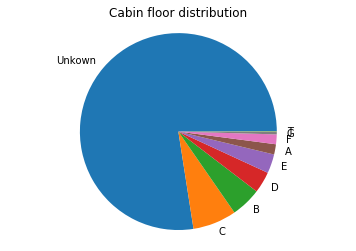

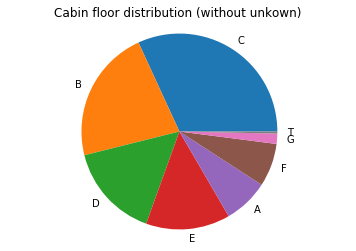

In [499]:
# 3

totalPassengers = data.size

# By examining the data we can observe the cabin floor is represented by an uppercase letter in first position
cabins = data['cabin'].str.extract('(\w).*', expand=False).fillna('Unkown')
cabins.value_counts().plot.pie(title='Cabin floor distribution')
plt.axis('equal');
plt.ylabel('')

plt.figure(0)

# We also plot a pie without the unkown values for better vizualization
cabins = data['cabin'].str.extract('(\w).*', expand=False).dropna()
cabins.value_counts().plot.pie(title='Cabin floor distribution (without unkown)')
plt.axis('equal');
plt.ylabel('')

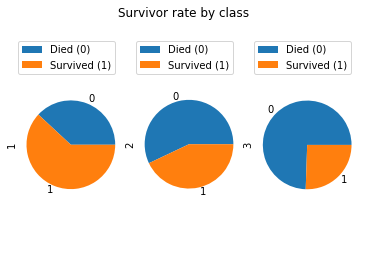

In [500]:
# 4

classSurvive = data.groupby(['pclass','survived']).size()
axes = classSurvive.unstack(level=0).plot(kind='pie', subplots=True, title='Survivor rate by class')
for ax in axes:
    ax.axis('equal')
    ax.legend(['Died (0)', 'Survived (1)'])


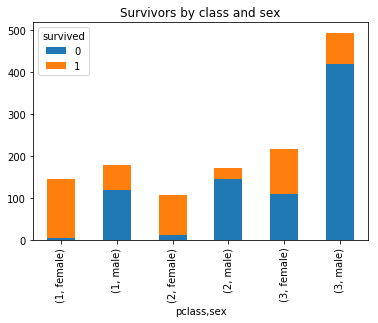

In [501]:
# 5

survived = data.groupby(['pclass','sex','survived']).size()
axes = survived.unstack(2).plot(kind='bar', stacked=True, title='Survivors by class and sex')


In [502]:
# 6

ageMedian = data['age'].median()
subAge = data['age'] < ageMedian
subAge.name = 'ageCat'

dataAge = pd.concat([data, subAge], axis=1)

subSur = dataAge.groupby(['ageCat','pclass','sex','survived']).size()

print(subSur)

ageCat  pclass  sex     survived
False   1       female  0             3
                        1           101
                male    0           105
                        1            46
        2       female  0             7
                        1            48
                male    0            94
                        1             9
        3       female  0            60
                        1            50
                male    0           248
                        1            34
True    1       female  0             2
                        1            38
                male    0            13
                        1            15
        2       female  0             5
                        1            46
                male    0            52
                        1            16
        3       female  0            50
                        1            56
                male    0           170
                        1            41
dtype: 